In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
train_df = pd.read_csv('datasets/train/train_text_seq.csv')
valid_df = pd.read_csv('datasets/valid/valid_text_seq.csv')

In [12]:
train_df.head()

,input_str,label
0,0000154364642718159661428002624223132284159626...,0
1,0004641596369515436422262614110471596262476161...,0
2,0001543626215965999614422464135806142624051159...,0
3,0000154364224641238614262159689561596284351061...,1
4,0004641899422154362069015966142624761262159661...,1


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7080 entries, 0 to 7079
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   input_str  7080 non-null   object
 1   label      7080 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 110.8+ KB


# One hot encoding and logistic regression

In [21]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the training and validation datasets
train_data = pd.read_csv('datasets/train/train_text_seq.csv')
valid_data = pd.read_csv('datasets/valid/valid_text_seq.csv')

# Split into features and labels
X_train = train_data['input_str'].apply(lambda x: [int(digit) for digit in x]).tolist()  # Convert string to list of integers
y_train = train_data['label'].astype(int)

X_valid = valid_data['input_str'].apply(lambda x: [int(digit) for digit in x]).tolist()  # Convert string to list of integers
y_valid = valid_data['label'].astype(int)

# One-hot encode the digits for both train and validation sets
encoder = OneHotEncoder(categories=[list(range(10))] * 50)  # 10 categories (digits) for each of the 50 positions
X_train_encoded = encoder.fit_transform(X_train).toarray()  # Convert to one-hot encoded matrix
X_valid_encoded = encoder.transform(X_valid).toarray()      # One-hot encode validation set

# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_encoded, y_train)

# Predict on validation set
y_valid_pred = model.predict(X_valid_encoded)

# Accuracy
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f'Validation Accuracy: {valid_accuracy:.4f}')


Validation Accuracy: 0.6544


# One Hot encoding and Decision trees

In [27]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the training and validation datasets
train_data = pd.read_csv('datasets/train/train_text_seq.csv')
valid_data = pd.read_csv('datasets/valid/valid_text_seq.csv')

# Convert input strings to lists of digits
X_train = train_data['input_str'].apply(lambda x: [int(digit) for digit in x]).tolist()  # Convert string to list of integers
y_train = train_data['label'].astype(int)

X_valid = valid_data['input_str'].apply(lambda x: [int(digit) for digit in x]).tolist()  # Convert string to list of integers
y_valid = valid_data['label'].astype(int)

# One-hot encode the digits for both train and validation sets
encoder = OneHotEncoder(categories=[list(range(10))] * 50, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train).toarray()  # Convert to one-hot encoded matrix
X_valid_encoded = encoder.transform(X_valid).toarray()      # One-hot encode validation set

# Train a Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_encoded, y_train)

# Predict on the validation set
y_valid_pred = decision_tree.predict(X_valid_encoded)

# Accuracy on the validation set
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f'Validation Accuracy with Decision Tree: {valid_accuracy:.4f}')


Validation Accuracy with Decision Tree: 0.5726


# One hot encoding and random forest

In [32]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the training and validation datasets
train_data = pd.read_csv('datasets/train/train_text_seq.csv')
valid_data = pd.read_csv('datasets/valid/valid_text_seq.csv')

# Convert input strings to lists of digits
X_train = train_data['input_str'].apply(lambda x: [int(digit) for digit in x]).tolist()  # Convert string to list of integers
y_train = train_data['label'].astype(int)

X_valid = valid_data['input_str'].apply(lambda x: [int(digit) for digit in x]).tolist()  # Convert string to list of integers
y_valid = valid_data['label'].astype(int)

# One-hot encode the digits for both train and validation sets
encoder = OneHotEncoder(categories=[list(range(10))] * 50, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train).toarray()  # Convert to one-hot encoded matrix
X_valid_encoded = encoder.transform(X_valid).toarray()      # One-hot encode validation set

# Train a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_encoded, y_train)

# Predict on the validation set
y_valid_pred = random_forest.predict(X_valid_encoded)

# Accuracy on the validation set
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f'Validation Accuracy with Random Forest: {valid_accuracy:.4f}')


Validation Accuracy with Random Forest: 0.6564


# One hot and SVM

In [35]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the training and validation datasets
train_data = pd.read_csv('datasets/train/train_text_seq.csv')
valid_data = pd.read_csv('datasets/valid/valid_text_seq.csv')

# Convert input strings to lists of digits
X_train = train_data['input_str'].apply(lambda x: [int(digit) for digit in x]).tolist()
y_train = train_data['label'].astype(int)

X_valid = valid_data['input_str'].apply(lambda x: [int(digit) for digit in x]).tolist()
y_valid = valid_data['label'].astype(int)

# One-hot encode the digits for both train and validation sets
encoder = OneHotEncoder(categories=[list(range(10))] * 50, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train).toarray()  # Convert to one-hot encoded matrix
X_valid_encoded = encoder.transform(X_valid).toarray()      # One-hot encode validation set

# Train a Support Vector Machine classifier
svm_model = SVC(random_state=42)
svm_model.fit(X_train_encoded, y_train)

# Predict on the validation set
y_valid_pred = svm_model.predict(X_valid_encoded)

# Accuracy on the validation set
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f'Validation Accuracy with SVM: {valid_accuracy:.4f}')


Validation Accuracy with SVM: 0.6748


# Embeddings and SVM

In [38]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the training and validation datasets
train_data = pd.read_csv('datasets/train/train_text_seq.csv')
valid_data = pd.read_csv('datasets/valid/valid_text_seq.csv')

# Convert input strings to lists of digits
X_train = train_data['input_str'].apply(lambda x: [int(digit) for digit in x]).tolist()
y_train = train_data['label'].astype(int)

X_valid = valid_data['input_str'].apply(lambda x: [int(digit) for digit in x]).tolist()
y_valid = valid_data['label'].astype(int)

# Create embeddings for digits (0-9), e.g., 4-dimensional embeddings for each digit
embedding_dim = 4  # You can adjust the dimension based on complexity
digit_embedding = np.random.rand(10, embedding_dim)  # Randomly initialize embeddings for digits 0-9

# Convert input sequences to their corresponding embeddings
def embed_sequence(sequence, embedding_matrix):
    return np.concatenate([embedding_matrix[digit] for digit in sequence])

X_train_embedded = np.array([embed_sequence(seq, digit_embedding) for seq in X_train])
X_valid_embedded = np.array([embed_sequence(seq, digit_embedding) for seq in X_valid])

# Train a Support Vector Machine classifier using embedded features
svm_model = SVC(random_state=42)
svm_model.fit(X_train_embedded, y_train)

# Predict on the validation set
y_valid_pred = svm_model.predict(X_valid_embedded)

# Accuracy on the validation set
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f'Validation Accuracy with SVM using Embeddings: {valid_accuracy:.4f}')


Validation Accuracy with SVM using Embeddings: 0.6196


# Embeddings and Random forest

In [41]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the training and validation datasets
train_data = pd.read_csv('datasets/train/train_text_seq.csv')
valid_data = pd.read_csv('datasets/valid/valid_text_seq.csv')

# Convert input strings to lists of digits
X_train = train_data['input_str'].apply(lambda x: [int(digit) for digit in x]).tolist()
y_train = train_data['label'].astype(int)

X_valid = valid_data['input_str'].apply(lambda x: [int(digit) for digit in x]).tolist()
y_valid = valid_data['label'].astype(int)

# Create embeddings for digits (0-9), e.g., 4-dimensional embeddings for each digit
embedding_dim = 4  # Adjust the embedding dimension if needed
digit_embedding = np.random.rand(10, embedding_dim)  # Randomly initialize embeddings for digits 0-9

# Convert input sequences to their corresponding embeddings
def embed_sequence(sequence, embedding_matrix):
    return np.concatenate([embedding_matrix[digit] for digit in sequence])

X_train_embedded = np.array([embed_sequence(seq, digit_embedding) for seq in X_train])
X_valid_embedded = np.array([embed_sequence(seq, digit_embedding) for seq in X_valid])

# Train a Random Forest classifier using embedded features
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_embedded, y_train)

# Predict on the validation set
y_valid_pred = rf_model.predict(X_valid_embedded)

# Accuracy on the validation set
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f'Validation Accuracy with Random Forest using Embeddings: {valid_accuracy:.4f}')


Validation Accuracy with Random Forest using Embeddings: 0.6278


# n-grams and rf

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the training and validation datasets
train_data = pd.read_csv('dataset.csv')
valid_data = pd.read_csv('path_to_valid_dataset.csv')

# Convert input strings to lists of digits
X_train = train_data['input_str'].tolist()
y_train = train_data['label'].astype(int)

X_valid = valid_data['input_str'].tolist()
y_valid = valid_data['label'].astype(int)

# Use n-gram feature extraction (bi-grams and tri-grams)
vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 3))  # n-grams of size 2 and 3
X_train_ngrams = vectorizer.fit_transform(X_train)
X_valid_ngrams = vectorizer.transform(X_valid)

# Train a Random Forest classifier on n-gram features
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_ngrams, y_train)

# Predict on the validation set
y_valid_pred = rf_model.predict(X_valid_ngrams)

# Accuracy on the validation set
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f'Validation Accuracy with Random Forest (N-grams): {valid_accuracy:.4f}')


# N-grams and svm

In [48]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the training and validation datasets
train_data = pd.read_csv('datasets/train/train_text_seq.csv')
valid_data = pd.read_csv('datasets/valid/valid_text_seq.csv')

# Convert input strings to lists of digits
X_train = train_data['input_str'].tolist()
y_train = train_data['label'].astype(int)

X_valid = valid_data['input_str'].tolist()
y_valid = valid_data['label'].astype(int)

# Use n-gram feature extraction (bi-grams and tri-grams)
vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 3))  # Extract bi-grams and tri-grams
X_train_ngrams = vectorizer.fit_transform(X_train)
X_valid_ngrams = vectorizer.transform(X_valid)

# Train an SVM classifier on n-gram features
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_ngrams, y_train)

# Predict on the validation set
y_valid_pred = svm_model.predict(X_valid_ngrams)

# Accuracy on the validation set
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f'Validation Accuracy with SVM (N-grams): {valid_accuracy:.4f}')


Validation Accuracy with SVM (N-grams): 0.5849


In [50]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the training and validation datasets
train_data = pd.read_csv('datasets/train/train_text_seq.csv')
valid_data = pd.read_csv('datasets/valid/valid_text_seq.csv')

# Prepare input data
X_train = train_data['input_str'].tolist()
y_train = train_data['label'].astype(int)

X_valid = valid_data['input_str'].tolist()
y_valid = valid_data['label'].astype(int)

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)

# Convert input strings to sequences of integers
max_length = 50  # Length of input_str
num_classes = len(np.unique(y_train_encoded))  # Number of classes (0 or 1)

# Create a mapping from digit to integer
digit_to_int = {str(i): i for i in range(10)}

# Convert strings to sequences of integers
def string_to_sequence(s):
    return [digit_to_int[digit] for digit in s]

X_train_seq = np.array([string_to_sequence(s) for s in X_train])
X_valid_seq = np.array([string_to_sequence(s) for s in X_valid])

# Pad sequences to ensure uniform length
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_seq = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_valid_seq = pad_sequences(X_valid_seq, maxlen=max_length, padding='post')

# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=10, output_dim=64, input_length=max_length))  # 10 possible digits
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))  # Use softmax for multi-class classification

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_seq, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_valid_seq, y_valid_encoded))

# Evaluate the model
loss, accuracy = model.evaluate(X_valid_seq, y_valid_encoded)
print(f'Validation Accuracy with LSTM: {accuracy:.4f}')


C:\Users\shash\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.5148 - loss: 0.6915 - val_accuracy: 0.6462 - val_loss: 0.6465
Epoch 2/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.6077 - loss: 0.6571 - val_accuracy: 0.6421 - val_loss: 0.6572
Epoch 3/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.6293 - loss: 0.6420 - val_accuracy: 0.6503 - val_loss: 0.6135
Epoch 4/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.6610 - loss: 0.6208 - val_accuracy: 0.6892 - val_loss: 0.6026
Epoch 5/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.6727 - loss: 0.6010 - val_accuracy: 0.6810 - val_loss: 0.5952
Epoch 6/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.6849 - loss: 0.5899 - val_accuracy: 0.6912 - val_loss: 0.5788
Epoch 7/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.6957 - loss: 0.5698 - val_accuracy: 0.6748 - val_loss: 0.5963
Epoch 8/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.7047 - loss: 0.5700 - val_acc

# Embeddings

In [54]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the training and validation datasets
train_data = pd.read_csv('datasets/train/train_text_seq.csv')
valid_data = pd.read_csv('datasets/valid/valid_text_seq.csv')

# Prepare input data
X_train = train_data['input_str'].tolist()
y_train = train_data['label'].astype(int)

X_valid = valid_data['input_str'].tolist()
y_valid = valid_data['label'].astype(int)

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)

# Convert input strings to sequences of integers
max_length = 50  # Length of input_str
num_classes = len(np.unique(y_train_encoded))  # Number of classes (0 or 1)

# Create a mapping from digit to integer
digit_to_int = {str(i): i for i in range(10)}

# Convert strings to sequences of integers
def string_to_sequence(s):
    return [digit_to_int[digit] for digit in s]

X_train_seq = np.array([string_to_sequence(s) for s in X_train])
X_valid_seq = np.array([string_to_sequence(s) for s in X_valid])

# Pad sequences to ensure uniform length
X_train_seq = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_valid_seq = pad_sequences(X_valid_seq, maxlen=max_length, padding='post')

# Define the Embedding + Dense Model
model = Sequential()

# Embedding layer: transforms each digit into a 64-dimensional vector
model.add(Embedding(input_dim=10, output_dim=64, input_length=max_length))

# Flatten the output of the embedding layer to feed into dense layers
model.add(Flatten())

# Dense layers for classification
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Add dropout to prevent overfitting
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))

# Output layer for binary classification (since this is a binary classification task)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_seq, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_valid_seq, y_valid_encoded))

# Evaluate the model
loss, accuracy = model.evaluate(X_valid_seq, y_valid_encoded)
print(f'Validation Accuracy with Embedding + Dense: {accuracy:.4f}')


C:\Users\shash\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.5169 - loss: 0.6939 - val_accuracy: 0.5849 - val_loss: 0.6651
Epoch 2/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.6305 - loss: 0.6404 - val_accuracy: 0.6401 - val_loss: 0.6195
Epoch 3/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6854 - loss: 0.5942 - val_accuracy: 0.6585 - val_loss: 0.6093
Epoch 4/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.7158 - loss: 0.5450 - val_accuracy: 0.6605 - val_loss: 0.6178
Epoch 5/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.7589 - loss: 0.5026 - val_accuracy: 0.6421 - val_loss: 0.6327
Epoch 6/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.7825 - loss: 0.4564 - val_accuracy: 0.6564 - val_loss: 0.7007
Epoch 7/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8084 - loss: 0.4164 - val_accuracy: 0.6380 - val_loss: 0.7079
Epoch 8/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8617 - loss: 0.3298 - val_accu

# Autoencoder

In [57]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the training and validation datasets
train_data = pd.read_csv('datasets/train/train_text_seq.csv')
valid_data = pd.read_csv('datasets/valid/valid_text_seq.csv')

# Prepare input data
X_train = train_data['input_str'].tolist()
y_train = train_data['label'].astype(int)

X_valid = valid_data['input_str'].tolist()
y_valid = valid_data['label'].astype(int)

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)

# Convert input strings to sequences of integers
max_length = 50  # Length of input_str
num_classes = len(np.unique(y_train_encoded))  # Number of classes (0 or 1)

# Create a mapping from digit to integer
digit_to_int = {str(i): i for i in range(10)}

# Convert strings to sequences of integers
def string_to_sequence(s):
    return [digit_to_int[digit] for digit in s]

X_train_seq = np.array([string_to_sequence(s) for s in X_train])
X_valid_seq = np.array([string_to_sequence(s) for s in X_valid])

# Pad sequences to ensure uniform length
X_train_seq = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_valid_seq = pad_sequences(X_valid_seq, maxlen=max_length, padding='post')

# Flatten the input sequences
X_train_seq = X_train_seq.reshape(X_train_seq.shape[0], -1)
X_valid_seq = X_valid_seq.reshape(X_valid_seq.shape[0], -1)

# Autoencoder model definition
encoding_dim = 32  # Size of the encoded representations (this can be tuned)

# Input layer
input_layer = Input(shape=(max_length,))

# Encoder: compressing the input
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='relu')(encoded)  # Encoded layer

# Decoder: reconstructing the input
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(max_length, activation='sigmoid')(decoded)  # Sigmoid for binary-like output (0-9 digits)

# Autoencoder model
autoencoder = Model(input_layer, decoded)

# Encoder model to extract encoded features
encoder = Model(input_layer, encoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train_seq, X_train_seq, epochs=10, batch_size=32, validation_data=(X_valid_seq, X_valid_seq))

# Use the encoder to transform input data
X_train_encoded = encoder.predict(X_train_seq)
X_valid_encoded = encoder.predict(X_valid_seq)

# Now, let's define a Dense classifier model using the encoded features
classifier = Sequential()

# Input layer for the encoded features
classifier.add(Dense(64, input_dim=encoding_dim, activation='relu'))
classifier.add(Dropout(0.5))

# Hidden layer
classifier.add(Dense(32, activation='relu'))
classifier.add(Dropout(0.5))

# Output layer for binary classification
classifier.add(Dense(1, activation='sigmoid'))

# Compile the classifier
classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the classifier on the encoded data
classifier.fit(X_train_encoded, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_valid_encoded, y_valid_encoded))

# Evaluate the classifier
loss, accuracy = classifier.evaluate(X_valid_encoded, y_valid_encoded)
print(f'Validation Accuracy with Autoencoder + Dense Classifier: {accuracy:.4f}')


Epoch 1/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 14.7631 - val_loss: 14.2504
Epoch 2/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - loss: 14.2540 - val_loss: 14.2504
Epoch 3/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 14.2551 - val_loss: 14.2304
Epoch 4/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 14.2426 - val_loss: 14.2304
Epoch 5/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 14.2506 - val_loss: 14.2304
Epoch 6/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 14.2189 - val_loss: 14.2304
Epoch 7/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 14.2186 - val_loss: 14.2304
Epoch 8/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - loss: 14.2636 - val_loss: 14.2304
Epoch 9/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - loss: 14.2369 - val_loss: 14.2304
Epoch 10/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 14.2311 - val_loss: 14.2304
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step
Epoch 1/10


C:\Users\shash\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4933 - loss: 2.9171 - val_accuracy: 0.5010 - val_loss: 0.6943
Epoch 2/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.4969 - loss: 0.7212 - val_accuracy: 0.4867 - val_loss: 0.6940
Epoch 3/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.4871 - loss: 0.7069 - val_accuracy: 0.4519 - val_loss: 0.6949
Epoch 4/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.5009 - loss: 0.7011 - val_accuracy: 0.4683 - val_loss: 0.6944
Epoch 5/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.4983 - loss: 0.6944 - val_accuracy: 0.4990 - val_loss: 0.6931
Epoch 6/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.5068 - loss: 0.6932 - val_accuracy: 0.5153 - val_loss: 0.6929
Epoch 7/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.5054 - loss: 0.6933 - val_accuracy: 0.5133 - val_loss: 0.6929
Epoch 8/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.5118 - loss: 0.6929 - val_accuracy:

# Feature engineering and rf

In [60]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter

# Load the training and validation datasets
train_data = pd.read_csv('datasets/train/train_text_seq.csv')
valid_data = pd.read_csv('datasets/valid/valid_text_seq.csv')

# Prepare input data
X_train = train_data['input_str'].tolist()
y_train = train_data['label'].astype(int)

X_valid = valid_data['input_str'].tolist()
y_valid = valid_data['label'].astype(int)

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)

# Feature extraction function
def extract_features(sequences):
    features = []
    
    for seq in sequences:
        # Count digit frequencies
        digit_counts = Counter(seq)
        
        # Extract specific features (digit counts)
        feature = [
            digit_counts.get(str(i), 0) for i in range(10)  # Count for each digit 0-9
        ]
        
        # Add more features like length of the sequence
        feature.append(len(seq))  # Length of the sequence
        feature.append(len(set(seq)))  # Unique digits count
        
        features.append(feature)
    
    return np.array(features)

# Extract features for training and validation data
X_train_features = extract_features(X_train)
X_valid_features = extract_features(X_valid)

# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_features, y_train_encoded)

# Predict on validation set
y_valid_pred = rf_model.predict(X_valid_features)

# Evaluate model performance
accuracy = accuracy_score(y_valid_encoded, y_valid_pred)
print(f'Validation Accuracy with Random Forest: {accuracy:.4f}')


Validation Accuracy with Random Forest: 0.5112


In [62]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from collections import Counter

# Load the training and validation datasets
train_data = pd.read_csv('datasets/train/train_text_seq.csv')
valid_data = pd.read_csv('datasets/valid/valid_text_seq.csv')

# Prepare input data
X_train = train_data['input_str'].tolist()
y_train = train_data['label'].astype(int)

X_valid = valid_data['input_str'].tolist()
y_valid = valid_data['label'].astype(int)

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)

# Feature extraction function (digit frequencies)
def extract_features(sequences):
    features = []
    for seq in sequences:
        digit_counts = Counter(seq)
        # Feature: Count of each digit from 0-9
        feature = [digit_counts.get(str(i), 0) for i in range(10)]
        features.append(feature)
    return np.array(features)

# Extract features for training and validation data
X_train_features = extract_features(X_train)
X_valid_features = extract_features(X_valid)

# Train a simple Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_features, y_train_encoded)

# Predict on validation set
y_valid_pred = lr_model.predict(X_valid_features)

# Evaluate model performance
accuracy = accuracy_score(y_valid_encoded, y_valid_pred)
print(f'Validation Accuracy with Logistic Regression: {accuracy:.4f}')


Validation Accuracy with Logistic Regression: 0.4867


# Latest attempt (16 oct)

In [4]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Function to load and preprocess the datasets
def load_and_preprocess_data(train_path, valid_path, n_components=0.95):
    # Load datasets
    train_df = pd.read_csv(train_path)
    valid_df = pd.read_csv(valid_path)

    # Convert string of digits into feature vectors
    train_df['input_vector'] = train_df['input_str'].apply(lambda x: [int(digit) for digit in x])
    valid_df['input_vector'] = valid_df['input_str'].apply(lambda x: [int(digit) for digit in x])

    # Extract features and labels
    X_train = train_df['input_vector'].tolist()
    y_train = train_df['label'].values
    X_valid = valid_df['input_vector'].tolist()
    y_valid = valid_df['label'].values

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)  # Use the same scaler for valid data

    # Apply PCA, retaining n_components variance
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_valid_pca = pca.transform(X_valid_scaled)  # Use the same PCA model for valid data

    # Print variance explained by the components
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
    print(f"Total variance retained: {sum(pca.explained_variance_ratio_)}")

    return X_train_pca, y_train, X_valid_pca, y_valid

# Paths to the train and validation datasets
train_dataset_path = "datasets/train/train_text_seq.csv"
valid_dataset_path = "datasets/valid/valid_text_seq.csv"

# Preprocess the datasets
X_train_pca, y_train, X_valid_pca, y_valid = load_and_preprocess_data(train_dataset_path, valid_dataset_path)


Explained variance ratio: [0.05062827 0.04320568 0.03987028 0.03561594 0.03367924 0.03270504
 0.03213547 0.02767353 0.02691255 0.02681958 0.02599716 0.02524394
 0.02476184 0.02453327 0.02414367 0.02403631 0.02315275 0.02274812
 0.02248391 0.02208483 0.02182421 0.02146048 0.02108077 0.02090118
 0.0204963  0.01981746 0.01944835 0.01926279 0.01899436 0.01847271
 0.01808617 0.01763494 0.01689247 0.01647607 0.01584919 0.0150154
 0.01462139 0.01375379 0.01296191 0.01289598 0.01118076]
Total variance retained: 0.9555580841014647


In [6]:
X_train_pca

array([[-1.03217464e-01, -7.40473884e-01, -2.19208904e+00, ...,
         7.16624422e-01,  2.06919675e-03,  6.43080476e-01],
       [-1.38540524e+00,  3.10916586e-01,  6.49294693e-01, ...,
        -9.16629599e-01, -1.03619651e+00,  2.11782017e+00],
       [ 2.39028819e+00, -2.27258025e+00,  1.20407402e+00, ...,
         1.14267163e+00, -3.62233286e-01, -1.53393245e+00],
       ...,
       [ 5.23075994e-01,  1.53731741e+00, -1.76094616e+00, ...,
        -3.30845701e-01, -8.16786546e-01,  2.60863560e-01],
       [ 1.92259805e+00, -5.41952969e-01,  9.83807351e-01, ...,
        -2.16558533e+00,  7.12571176e-01, -1.29818664e+00],
       [-1.17541815e+00, -1.45447658e-01, -2.10847204e+00, ...,
         5.15745770e-01,  1.30711442e-02, -3.97689573e-01]])

In [8]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Function to train and evaluate Gradient Boosting model with cross-validation
def gradient_boosting_with_cv(X_train_pca, y_train, X_valid_pca, y_valid, n_splits=5):
    # Initialize XGBoost classifier with default parameters (can be tuned later)
    xgb_model = xgb.XGBClassifier(
        objective='binary:logistic',  # For binary classification
        eval_metric='logloss',        # Loss metric for binary classification
        use_label_encoder=False,      # Suppress warning
        random_state=42
    )

    # Set up Stratified K-Fold cross-validation
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Perform cross-validation
    cv_scores = cross_val_score(xgb_model, X_train_pca, y_train, cv=skf, scoring='accuracy')
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
    
    # Train the model on the full training set
    xgb_model.fit(X_train_pca, y_train)

    # Predict on the validation set
    y_pred = xgb_model.predict(X_valid_pca)

    # Evaluate performance on the validation set
    print("\nValidation Set Performance:")
    print(f"Accuracy: {accuracy_score(y_valid, y_pred):.4f}")
    print(f"Classification Report:\n{classification_report(y_valid, y_pred)}")

# Paths to your datasets (already preprocessed with PCA)
train_dataset_path = "datasets/train/train_text_seq.csv"
valid_dataset_path = "datasets/valid/valid_text_seq.csv"

# Preprocess the datasets (from previous step)
X_train_pca, y_train, X_valid_pca, y_valid = load_and_preprocess_data(train_dataset_path, valid_dataset_path)

# Run Gradient Boosting with cross-validation
gradient_boosting_with_cv(X_train_pca, y_train, X_valid_pca, y_valid)


Explained variance ratio: [0.05062827 0.04320568 0.03987028 0.03561594 0.03367924 0.03270504
 0.03213547 0.02767353 0.02691255 0.02681958 0.02599716 0.02524394
 0.02476184 0.02453327 0.02414367 0.02403631 0.02315275 0.02274812
 0.02248391 0.02208483 0.02182421 0.02146048 0.02108077 0.02090118
 0.0204963  0.01981746 0.01944835 0.01926279 0.01899436 0.01847271
 0.01808617 0.01763494 0.01689247 0.01647607 0.01584919 0.0150154
 0.01462139 0.01375379 0.01296191 0.01289598 0.01118076]
Total variance retained: 0.9555580841014647


C:\Users\shash\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\shash\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\shash\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\shash\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\shash\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\shash\anaconda3\lib\site-packages\xgboost\sklearn.p

Cross-Validation Scores: [0.5289548  0.50776836 0.52189266 0.50918079 0.50070621]
Mean CV Accuracy: 0.5137

Validation Set Performance:
Accuracy: 0.4908
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.48      0.49       252
           1       0.48      0.50      0.49       237

    accuracy                           0.49       489
   macro avg       0.49      0.49      0.49       489
weighted avg       0.49      0.49      0.49       489



In [24]:
df = pd.read_csv("datasets/train/train_text_seq.csv")
valid_df = pd.read_csv("datasets/valid/valid_text_seq.csv")

(array([3576.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3504.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

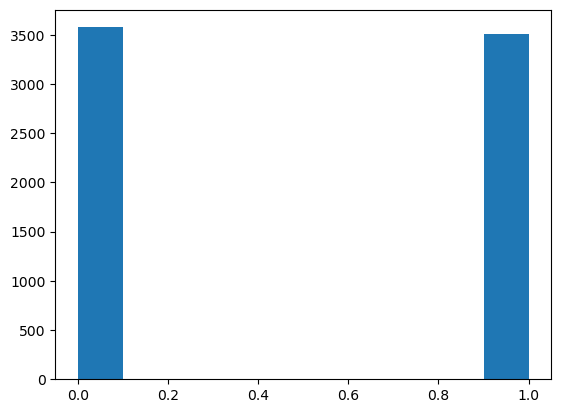

In [17]:
plt.hist(df['label'])

In [26]:
df['input_str'] = df['input_str'].apply(lambda x: x[3:])
valid_df['input_str'] = valid_df['input_str'].apply(lambda x: x[3:])

In [21]:
df.head()

,input_str,label
0,01543646427181596614280026242231322841596262614,0
1,46415963695154364222626141104715962624761614284,0
2,15436262159659996144224641358061426240511596284,0
3,01543642246412386142621596895615962843510614262,1
4,46418994221543620690159661426247612621596614284,1


In [30]:
import pandas as pd
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Function to preprocess data using specified n-grams
def preprocess_data(data, ngrams_to_use, ngram_range=(2, 4)):
    # Drop the initial three zeros from each input_str
    data['processed_str'] = data['input_str'].apply(lambda x: x[3:])
    
    # Extract n-grams and count occurrences based on the specified n-grams
    for n in range(ngram_range[0], ngram_range[1] + 1):
        for ngram in ngrams_to_use.get(n, []):
            data[f'ngram_{n}_{ngram}'] = data['processed_str'].apply(
                lambda seq: Counter([seq[i:i+n] for i in range(len(seq) - n + 1)]).get(ngram, 0)
            )
    
    return data

# Step 1: Identify common n-grams in the training data
def get_top_ngrams(data, ngram_range=(2, 4), top_n=10):
    ngram_counts = {n: [] for n in range(ngram_range[0], ngram_range[1] + 1)}
    for seq in data['processed_str']:
        for n in ngram_counts.keys():
            ngrams = Counter([seq[i:i+n] for i in range(len(seq) - n + 1)])
            ngram_counts[n].append(ngrams)
    
    # Identify the most common n-grams for each n value
    top_ngrams = {}
    for n, counts_list in ngram_counts.items():
        all_ngrams = Counter([ngram for counts in counts_list for ngram in counts])
        top_ngrams[n] = [ngram for ngram, _ in all_ngrams.most_common(top_n)]
    
    return top_ngrams

# Preprocess the training data and get the top n-grams
df['processed_str'] = df['input_str'].apply(lambda x: x[3:])
top_ngrams = get_top_ngrams(df)

# Step 2: Preprocess both training and validation data with the same n-grams
df = preprocess_data(df, top_ngrams)
valid_df = preprocess_data(valid_df, top_ngrams)

# Step 3: Align columns in training and validation sets
common_columns = [col for col in df.columns if col.startswith('ngram_')]
X_train = df[common_columns]
y_train = df['label']
X_valid = valid_df[common_columns]
y_valid = valid_df['label']

# Train and evaluate the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)

print(f'Validation Accuracy: {accuracy:.4f}')
print('\nClassification Report:')
print(report)


Validation Accuracy: 0.5276

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.50      0.52       252
           1       0.51      0.55      0.53       237

    accuracy                           0.53       489
   macro avg       0.53      0.53      0.53       489
weighted avg       0.53      0.53      0.53       489



# LSTM again

In [33]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, classification_report

# Parameters
embedding_dim = 50  # Embedding dimension
max_length = 50     # Max sequence length (adjust as needed)
num_epochs = 10     # Number of epochs
batch_size = 32     # Batch size

# Encode sequences using Tokenizer
tokenizer = Tokenizer(char_level=True)  # Since sequences are digit-based, use char_level=True
tokenizer.fit_on_texts(df['processed_str'])

# Convert sequences to integer sequences
X_train_seq = tokenizer.texts_to_sequences(df['processed_str'])
X_valid_seq = tokenizer.texts_to_sequences(valid_df['processed_str'])

# Pad sequences to ensure uniform input size
X_train = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_valid = pad_sequences(X_valid_seq, maxlen=max_length, padding='post')

# Prepare labels
y_train = df['label'].values
y_valid = valid_df['label'].values

# Define the LSTM model
vocab_size = len(tokenizer.word_index) + 1  # Vocabulary size (+1 for padding token)
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size,
                    validation_data=(X_valid, y_valid), verbose=1)

# Evaluate the model
y_pred_prob = model.predict(X_valid)
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)  # Convert probabilities to binary output

# Report accuracy and other metrics
accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)

print(f'Validation Accuracy: {accuracy:.4f}')
print('\nClassification Report:')
print(report)


Epoch 1/10


C:\Users\shash\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4907 - loss: 0.6941 - val_accuracy: 0.4888 - val_loss: 0.6932
Epoch 2/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5366 - loss: 0.6891 - val_accuracy: 0.6135 - val_loss: 0.6534
Epoch 3/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5925 - loss: 0.6678 - val_accuracy: 0.6299 - val_loss: 0.6547
Epoch 4/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6184 - loss: 0.6556 - val_accuracy: 0.6135 - val_loss: 0.6663
Epoch 5/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6283 - loss: 0.6528 - val_accuracy: 0.6544 - val_loss: 0.6375
Epoch 6/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6250 - loss: 0.6465 - val_accuracy: 0.6605 - val_loss: 0.6169
Epoch 7/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6618 - loss: 0.6146 - val_accuracy: 0.6973 - val_loss: 0.6143
Epoch 8/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6590 - loss: 0.6263 - val_accuracy: 0.691

# LSTM with n-grams

In [36]:
import numpy as np
import pandas as pd
from collections import Counter
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Input, concatenate
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Parameters
embedding_dim = 50
max_length = 50
num_epochs = 10
batch_size = 32

# Function to preprocess the n-grams
def preprocess_ngrams(data, top_ngrams):
    for n in top_ngrams.keys():
        for ngram in top_ngrams[n]:
            data[f'ngram_{n}_{ngram}'] = data['processed_str'].apply(
                lambda seq: Counter([seq[i:i+n] for i in range(len(seq) - n + 1)]).get(ngram, 0)
            )
    return data

# Get the top n-grams from the training data
def get_top_ngrams(data, ngram_range=(2, 4), top_n=10):
    ngram_counts = {n: [] for n in range(ngram_range[0], ngram_range[1] + 1)}
    for seq in data['processed_str']:
        for n in ngram_counts.keys():
            ngrams = Counter([seq[i:i+n] for i in range(len(seq) - n + 1)])
            ngram_counts[n].append(ngrams)
    top_ngrams = {}
    for n, counts_list in ngram_counts.items():
        all_ngrams = Counter([ngram for counts in counts_list for ngram in counts])
        top_ngrams[n] = [ngram for ngram, _ in all_ngrams.most_common(top_n)]
    return top_ngrams

# Preprocess sequences
df['processed_str'] = df['input_str'].apply(lambda x: x[3:])
valid_df['processed_str'] = valid_df['input_str'].apply(lambda x: x[3:])

# Get the top n-grams and preprocess data for n-gram features
top_ngrams = get_top_ngrams(df)
df = preprocess_ngrams(df, top_ngrams)
valid_df = preprocess_ngrams(valid_df, top_ngrams)

# Tokenize sequences
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(df['processed_str'])
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(df['processed_str']), maxlen=max_length, padding='post')
X_valid_seq = pad_sequences(tokenizer.texts_to_sequences(valid_df['processed_str']), maxlen=max_length, padding='post')

# Prepare n-gram frequency features
ngram_features = [col for col in df.columns if col.startswith('ngram_')]
X_train_ngram = df[ngram_features].values
X_valid_ngram = valid_df[ngram_features].values

# Standardize n-gram features
scaler = StandardScaler()
X_train_ngram = scaler.fit_transform(X_train_ngram)
X_valid_ngram = scaler.transform(X_valid_ngram)

# Prepare labels
y_train = df['label'].values
y_valid = valid_df['label'].values

# Define the LSTM model with additional n-gram input
sequence_input = Input(shape=(max_length,))
embedding_layer = Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embedding_dim, input_length=max_length)(sequence_input)
lstm_out = LSTM(64)(embedding_layer)

ngram_input = Input(shape=(X_train_ngram.shape[1],))
merged = concatenate([lstm_out, ngram_input])

dense = Dense(64, activation='relu')(merged)
dropout = Dropout(0.5)(dense)
output = Dense(1, activation='sigmoid')(dropout)

model = Model(inputs=[sequence_input, ngram_input], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit([X_train_seq, X_train_ngram], y_train, epochs=num_epochs, batch_size=batch_size, 
          validation_data=([X_valid_seq, X_valid_ngram], y_valid), verbose=1)

# Evaluate the model
y_pred_prob = model.predict([X_valid_seq, X_valid_ngram])
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)

accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)

print(f'Validation Accuracy: {accuracy:.4f}')
print('\nClassification Report:')
print(report)


Epoch 1/10


C:\Users\shash\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5019 - loss: 0.7291 - val_accuracy: 0.4642 - val_loss: 0.6961
Epoch 2/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4975 - loss: 0.6947 - val_accuracy: 0.5010 - val_loss: 0.6945
Epoch 3/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5007 - loss: 0.6933 - val_accuracy: 0.5174 - val_loss: 0.6941
Epoch 4/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5137 - loss: 0.6922 - val_accuracy: 0.5031 - val_loss: 0.6938
Epoch 5/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5178 - loss: 0.6930 - val_accuracy: 0.5010 - val_loss: 0.6955
Epoch 6/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5221 - loss: 0.6912 - val_accuracy: 0.4928 - val_loss: 0.6947
Epoch 7/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5289 - loss: 0.6913 - val_accuracy: 0.5174 - val_loss: 0.6954
Epoch 8/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5158 - loss: 0.6913 - val_accuracy: 0.511

### Nai bakchodi

In [40]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv("datasets/train/train_text_seq.csv")
valid_df = pd.read_csv("datasets/valid/valid_text_seq.csv")

# Remove leading zeros from 'input_str'
train_df['processed_str'] = train_df['input_str'].str[3:]
valid_df['processed_str'] = valid_df['input_str'].str[3:]

# Split into individual digit features
train_split_digits = train_df['processed_str'].apply(lambda x: pd.Series(list(x)).astype(int))
valid_split_digits = valid_df['processed_str'].apply(lambda x: pd.Series(list(x)).astype(int))

# Standard deviation for each digit position using train set
variation = train_split_digits.std()

# Set thresholds for low and high variation
low_variation_threshold = 0.1
high_variation_threshold = 1.5

# Identify columns to drop
columns_to_drop = variation[(variation < low_variation_threshold) | (variation > high_variation_threshold)].index

# Drop columns from both datasets
filtered_train_digits = train_split_digits.drop(columns=columns_to_drop)
filtered_valid_digits = valid_split_digits.drop(columns=columns_to_drop)

# Merge digits back into strings
train_df['new_str'] = filtered_train_digits.apply(lambda row: ''.join(row.astype(str)), axis=1)
valid_df['new_str'] = filtered_valid_digits.apply(lambda row: ''.join(row.astype(str)), axis=1)

# # Save transformed data if needed
# train_df.to_csv("filtered_train.csv", index=False)
# valid_df.to_csv("filtered_valid.csv", index=False)

# print("Transformation complete. Processed datasets saved as 'filtered_train.csv' and 'filtered_valid.csv'.")


In [42]:
train_df.head()

,input_str,label,processed_str,new_str
0,0000154364642718159661428002624223132284159626...,0,01543646427181596614280026242231322841596262614,
1,0004641596369515436422262614110471596262476161...,0,46415963695154364222626141104715962624761614284,
2,0001543626215965999614422464135806142624051159...,0,15436262159659996144224641358061426240511596284,
3,0000154364224641238614262159689561596284351061...,1,01543642246412386142621596895615962843510614262,
4,0004641899422154362069015966142624761262159661...,1,46418994221543620690159661426247612621596614284,


In [44]:
import pandas as pd
from collections import Counter

# Load the datasets
train_df = pd.read_csv("datasets/train/train_text_seq.csv")
valid_df = pd.read_csv("datasets/valid/valid_text_seq.csv")

# Remove leading zeros from input_str
train_df['processed_str'] = train_df['input_str'].apply(lambda x: x[3:])
valid_df['processed_str'] = valid_df['input_str'].apply(lambda x: x[3:])

# Function to extract all substrings of lengths 2 to 7
def extract_substrings(sequence, min_len=2, max_len=7):
    substrings = []
    for length in range(min_len, max_len + 1):
        for i in range(len(sequence) - length + 1):
            substrings.append(sequence[i:i+length])
    return substrings

# Step 1: Get all substrings from the training data
all_train_substrings = []
for seq in train_df['processed_str']:
    all_train_substrings.extend(extract_substrings(seq))

# Count the frequency of each substring in the training data
substring_counts = Counter(all_train_substrings)

# Step 2: Select the top 13 most common substrings from the training data
top_substrings = [sub for sub, _ in substring_counts.most_common(13)]

# Step 3: Create features for both training and validation datasets
def add_substring_features(df, substrings):
    for substring in substrings:
        df[f'feature_{substring}'] = df['processed_str'].apply(lambda x: x.count(substring))
    return df

# Apply feature extraction to both datasets
train_df = add_substring_features(train_df, top_substrings)
valid_df = add_substring_features(valid_df, top_substrings)

# Display the new feature columns in the training and validation data
print("Top 13 substrings used as features:", top_substrings)
print("\nTraining data with new features:\n", train_df.head())
print("\nValidation data with new features:\n", valid_df.head())


Top 13 substrings used as features: ['15', '62', '26', '61', '42', '14', '96', '59', '262', '614', '596', '159', '1596']

Training data with new features:
                                            input_str  label  \
0  0000154364642718159661428002624223132284159626...      0   
1  0004641596369515436422262614110471596262476161...      0   
2  0001543626215965999614422464135806142624051159...      0   
3  0000154364224641238614262159689561596284351061...      1   
4  0004641899422154362069015966142624761262159661...      1   

                                     processed_str  feature_15  feature_62  \
0  01543646427181596614280026242231322841596262614           3           3   
1  46415963695154364222626141104715962624761614284           3           3   
2  15436262159659996144224641358061426240511596284           3           4   
3  01543642246412386142621596895615962843510614262           3           3   
4  46418994221543620690159661426247612621596614284           3           3 

In [46]:
train_df.head()

,input_str,label,processed_str,feature_15,feature_62,feature_26,feature_61,feature_42,feature_14,feature_96,feature_59,feature_262,feature_614,feature_596,feature_159,feature_1596
0,0000154364642718159661428002624223132284159626...,0,01543646427181596614280026242231322841596262614,3,3,3,2,3,2,2,2,2,2,2,2,2
1,0004641596369515436422262614110471596262476161...,0,46415963695154364222626141104715962624761614284,3,3,3,3,2,2,2,2,2,2,2,2,2
2,0001543626215965999614422464135806142624051159...,0,15436262159659996144224641358061426240511596284,3,4,2,2,2,2,3,3,2,2,2,2,2
3,0000154364224641238614262159689561596284351061...,1,01543642246412386142621596895615962843510614262,3,3,2,3,3,2,2,2,2,2,2,2,2
4,0004641899422154362069015966142624761262159661...,1,46418994221543620690159661426247612621596614284,3,3,2,3,3,2,2,2,2,2,2,2,2


In [48]:
import numpy as np
import pandas as pd
from collections import Counter
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the datasets
train_df = pd.read_csv("datasets/train/train_text_seq.csv")
valid_df = pd.read_csv("datasets/valid/valid_text_seq.csv")

# Remove leading zeros from input_str
train_df['processed_str'] = train_df['input_str'].apply(lambda x: x[3:])
valid_df['processed_str'] = valid_df['input_str'].apply(lambda x: x[3:])

# Function to extract all substrings of lengths 2 to 7
def extract_substrings(sequence, min_len=2, max_len=7):
    substrings = []
    for length in range(min_len, max_len + 1):
        for i in range(len(sequence) - length + 1):
            substrings.append(sequence[i:i+length])
    return substrings

# Step 1: Get all substrings from the training data
all_train_substrings = []
for seq in train_df['processed_str']:
    all_train_substrings.extend(extract_substrings(seq))

# Count the frequency of each substring in the training data
substring_counts = Counter(all_train_substrings)

# Step 2: Select the top 13 most common substrings from the training data
top_substrings = [sub for sub, _ in substring_counts.most_common(13)]

# Step 3: Create features for both training and validation datasets
def add_substring_features(df, substrings):
    for substring in substrings:
        df[f'feature_{substring}'] = df['processed_str'].apply(lambda x: x.count(substring))
    return df

# Apply feature extraction to both datasets
train_df = add_substring_features(train_df, top_substrings)
valid_df = add_substring_features(valid_df, top_substrings)

# Prepare the input and output for LSTM
X_train = train_df[[f'feature_{sub}' for sub in top_substrings]].values
y_train = train_df['label'].values
X_valid = valid_df[[f'feature_{sub}' for sub in top_substrings]].values
y_valid = valid_df['label'].values

# Reshape input for LSTM: (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_valid = X_valid.reshape((X_valid.shape[0], 1, X_valid.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_valid, y_valid))

# Predict on validation data
y_pred = model.predict(X_valid)
y_pred_classes = (y_pred > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred_classes)
print(f"Validation Accuracy: {accuracy:.2f}")


C:\Users\shash\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5035 - loss: 0.6933 - val_accuracy: 0.5153 - val_loss: 0.6930
Epoch 2/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5033 - loss: 0.6934 - val_accuracy: 0.5153 - val_loss: 0.6929
Epoch 3/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5118 - loss: 0.6932 - val_accuracy: 0.4826 - val_loss: 0.6934
Epoch 4/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4907 - loss: 0.6935 - val_accuracy: 0.5153 - val_loss: 0.6930
Epoch 5/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4945 - loss: 0.6933 - val_accuracy: 0.5153 - val_loss: 0.6928
Epoch 6/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5089 - loss: 0.6930 - val_accuracy: 0.5153 - val_loss: 0.6930
Epoch 7/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5078 - loss: 0.6931 - val_accuracy: 0.5153 - val_loss: 0.6930
Epoch 8/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5063 - loss: 0.6933 - val_accuracy: 0.

# Simple RNN

In [51]:
import numpy as np
import pandas as pd
from collections import Counter
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from sklearn.metrics import accuracy_score

# Load the datasets
train_df = pd.read_csv("datasets/train/train_text_seq.csv")
valid_df = pd.read_csv("datasets/valid/valid_text_seq.csv")

# Remove leading zeros from input_str
train_df['processed_str'] = train_df['input_str'].apply(lambda x: x[3:])
valid_df['processed_str'] = valid_df['input_str'].apply(lambda x: x[3:])

# Function to extract all substrings of lengths 2 to 7
def extract_substrings(sequence, min_len=2, max_len=7):
    substrings = []
    for length in range(min_len, max_len + 1):
        for i in range(len(sequence) - length + 1):
            substrings.append(sequence[i:i+length])
    return substrings

# Get all substrings from the training data
all_train_substrings = []
for seq in train_df['processed_str']:
    all_train_substrings.extend(extract_substrings(seq))

# Count the frequency of each substring in the training data
substring_counts = Counter(all_train_substrings)

# Select the top 13 most common substrings from the training data
top_substrings = [sub for sub, _ in substring_counts.most_common(13)]

# Create features for both training and validation datasets
def add_substring_features(df, substrings):
    for substring in substrings:
        df[f'feature_{substring}'] = df['processed_str'].apply(lambda x: x.count(substring))
    return df

# Apply feature extraction to both datasets
train_df = add_substring_features(train_df, top_substrings)
valid_df = add_substring_features(valid_df, top_substrings)

# Prepare the input and output for RNN
X_train = train_df[[f'feature_{sub}' for sub in top_substrings]].values
y_train = train_df['label'].values
X_valid = valid_df[[f'feature_{sub}' for sub in top_substrings]].values
y_valid = valid_df['label'].values

# Reshape input for RNN: (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_valid = X_valid.reshape((X_valid.shape[0], 1, X_valid.shape[1]))

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_valid, y_valid))

# Predict on validation data
y_pred = model.predict(X_valid)
y_pred_classes = (y_pred > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred_classes)
print(f"Validation Accuracy: {accuracy:.2f}")


Epoch 1/20


C:\Users\shash\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4952 - loss: 0.7583 - val_accuracy: 0.5153 - val_loss: 0.6936
Epoch 2/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5034 - loss: 0.6985 - val_accuracy: 0.4847 - val_loss: 0.6942
Epoch 3/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5008 - loss: 0.6962 - val_accuracy: 0.4949 - val_loss: 0.6932
Epoch 4/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5075 - loss: 0.6947 - val_accuracy: 0.4581 - val_loss: 0.6934
Epoch 5/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5006 - loss: 0.6941 - val_accuracy: 0.4928 - val_loss: 0.6935
Epoch 6/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4979 - loss: 0.6936 - val_accuracy: 0.5133 - val_loss: 0.6930
Epoch 7/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4973 - loss: 0.6943 - val_accuracy: 0.5153 - val_loss: 0.6930
Epoch 8/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5128 - loss: 0.6932 - val_accuracy: 0.5153 - val_

# GRU

In [54]:
import numpy as np
import pandas as pd
from collections import Counter
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

# Load the datasets
train_df = pd.read_csv("datasets/train/train_text_seq.csv")
valid_df = pd.read_csv("datasets/valid/valid_text_seq.csv")

# Remove leading zeros from input_str
train_df['processed_str'] = train_df['input_str'].apply(lambda x: x[3:])
valid_df['processed_str'] = valid_df['input_str'].apply(lambda x: x[3:])

# Function to extract all substrings of lengths 2 to 7
def extract_substrings(sequence, min_len=2, max_len=7):
    substrings = []
    for length in range(min_len, max_len + 1):
        for i in range(len(sequence) - length + 1):
            substrings.append(sequence[i:i+length])
    return substrings

# Get all substrings from the training data
all_train_substrings = []
for seq in train_df['processed_str']:
    all_train_substrings.extend(extract_substrings(seq))

# Count the frequency of each substring in the training data
substring_counts = Counter(all_train_substrings)

# Select the top 13 most common substrings from the training data
top_substrings = [sub for sub, _ in substring_counts.most_common(13)]

# Create features for both training and validation datasets
def add_substring_features(df, substrings):
    for substring in substrings:
        df[f'feature_{substring}'] = df['processed_str'].apply(lambda x: x.count(substring))
    return df

# Apply feature extraction to both datasets
train_df = add_substring_features(train_df, top_substrings)
valid_df = add_substring_features(valid_df, top_substrings)

# Prepare the input and output for RNN
X_train = train_df[[f'feature_{sub}' for sub in top_substrings]].values
y_train = train_df['label'].values
X_valid = valid_df[[f'feature_{sub}' for sub in top_substrings]].values
y_valid = valid_df['label'].values

# Reshape input for RNN: (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_valid = X_valid.reshape((X_valid.shape[0], 1, X_valid.shape[1]))

# Define the RNN model (using GRU)
model = Sequential()
model.add(GRU(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

# Predict on validation data
y_pred = model.predict(X_valid)
y_pred_classes = (y_pred > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred_classes)
print(f"Validation Accuracy: {accuracy:.2f}")


Epoch 1/50


C:\Users\shash\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5060 - loss: 0.6949 - val_accuracy: 0.5153 - val_loss: 0.6932
Epoch 2/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4987 - loss: 0.6942 - val_accuracy: 0.5153 - val_loss: 0.6928
Epoch 3/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5089 - loss: 0.6928 - val_accuracy: 0.4867 - val_loss: 0.6933
Epoch 4/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4998 - loss: 0.6934 - val_accuracy: 0.5153 - val_loss: 0.6929
Epoch 5/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5061 - loss: 0.6931 - val_accuracy: 0.5153 - val_loss: 0.6930
Epoch 6/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5105 - loss: 0.6927 - val_accuracy: 0.5153 - val_loss: 0.6931
Epoch 7/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5039 - loss: 0.6932 - val_accuracy: 0.5153 - val_loss: 0.6931
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Validation Accuracy: 0.52


In [56]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load the datasets
train_df = pd.read_csv("datasets/train/train_text_seq.csv")
valid_df = pd.read_csv("datasets/valid/valid_text_seq.csv")

# Step 1: Remove leading zeros
train_df['processed_str'] = train_df['input_str'].apply(lambda x: x[3:])
valid_df['processed_str'] = valid_df['input_str'].apply(lambda x: x[3:])

# Step 2: Character frequency analysis
def char_frequency(sequence):
    return Counter(sequence)

# Calculate character frequencies for the training set
train_char_counts = Counter()
for seq in train_df['processed_str']:
    train_char_counts.update(char_frequency(seq))

# Step 3: Removing rare substrings
def extract_frequent_substrings(sequence, min_len=2, max_len=7, min_freq=5):
    substrings = []
    for length in range(min_len, max_len + 1):
        for i in range(len(sequence) - length + 1):
            substring = sequence[i:i+length]
            substrings.append(substring)
    return [sub for sub in Counter(substrings).items() if sub[1] >= min_freq]

# Get frequent substrings from the training data
frequent_substrings = extract_frequent_substrings(''.join(train_df['processed_str']))

# Select the top 13 most common substrings
top_substrings = [sub[0] for sub in frequent_substrings[:13]]

# Step 4: Create features for both datasets
def add_substring_features(df, substrings):
    for substring in substrings:
        df[f'feature_{substring}'] = df['processed_str'].apply(lambda x: x.count(substring))
    df['seq_length'] = df['processed_str'].apply(len)  # Length of the sequence
    return df

# Apply feature extraction to both datasets
train_df = add_substring_features(train_df, top_substrings)
valid_df = add_substring_features(valid_df, top_substrings)

# Step 5: Normalize the features
scaler = StandardScaler()
X_train = train_df[[f'feature_{sub}' for sub in top_substrings] + ['seq_length']].values
X_valid = valid_df[[f'feature_{sub}' for sub in top_substrings] + ['seq_length']].values

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

# Step 6: Handle class imbalance using SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, train_df['label'])

# Reshape input for RNN: (samples, time steps, features)
X_train_resampled = X_train_resampled.reshape((X_train_resampled.shape[0], 1, X_train_resampled.shape[1]))
X_valid = X_valid.reshape((X_valid.shape[0], 1, X_valid.shape[1]))

# Step 7: Define the RNN model (using GRU or SimpleRNN)
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout

model = Sequential()
model.add(GRU(64, activation='relu', input_shape=(X_train_resampled.shape[1], X_train_resampled.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=32, validation_data=(X_valid, valid_df['label'].values))

# Predict on validation data
y_pred = model.predict(X_valid)
y_pred_classes = (y_pred > 0.5).astype(int)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(valid_df['label'].values, y_pred_classes)
print(f"Validation Accuracy: {accuracy:.2f}")


Epoch 1/20


C:\Users\shash\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


224/224 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5102 - loss: 0.6934 - val_accuracy: 0.4765 - val_loss: 0.6948
Epoch 2/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5366 - loss: 0.6915 - val_accuracy: 0.4969 - val_loss: 0.6937
Epoch 3/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5196 - loss: 0.6922 - val_accuracy: 0.4969 - val_loss: 0.6940
Epoch 4/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5370 - loss: 0.6901 - val_accuracy: 0.5092 - val_loss: 0.6944
Epoch 5/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5132 - loss: 0.6920 - val_accuracy: 0.4928 - val_loss: 0.6945
Epoch 6/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5327 - loss: 0.6902 - val_accuracy: 0.4928 - val_loss: 0.6956
Epoch 7/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5450 - loss: 0.6879 - val_accuracy: 0.4724 - val_loss: 0.6989
Epoch 8/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5406 - loss: 0.6885 - val_accuracy: 0.4785 - val_

# Some new approach

In [61]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# Load the datasets
train_df = pd.read_csv("datasets/train/train_text_seq.csv")
valid_df = pd.read_csv("datasets/valid/valid_text_seq.csv")

# Step 1: Remove leading zeros
train_df['processed_str'] = train_df['input_str'].apply(lambda x: x[3:])
valid_df['processed_str'] = valid_df['input_str'].apply(lambda x: x[3:])

# Step 2: Digit counts as features
def digit_counts(sequence):
    return [sequence.count(str(digit)) for digit in range(10)]

# Create digit count features
X_train = np.array([digit_counts(seq) for seq in train_df['processed_str']])
y_train = train_df['label'].values
X_valid = np.array([digit_counts(seq) for seq in valid_df['processed_str']])
y_valid = valid_df['label'].values

# Step 3: Reshape for LSTM input
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])  # Reshape to (samples, time steps, features)
X_valid = X_valid.reshape(X_valid.shape[0], 1, X_valid.shape[1])

# Step 4: Define the model with LSTM
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_valid, y_valid))

# Step 6: Evaluate the model
accuracy = model.evaluate(X_valid, y_valid)[1]
print(f"Validation Accuracy: {accuracy:.2f}")


Epoch 1/30


C:\Users\shash\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4973 - loss: 0.6944 - val_accuracy: 0.5153 - val_loss: 0.6933
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4977 - loss: 0.6939 - val_accuracy: 0.4724 - val_loss: 0.6936
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5004 - loss: 0.6935 - val_accuracy: 0.4683 - val_loss: 0.6935
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5109 - loss: 0.6929 - val_accuracy: 0.5153 - val_loss: 0.6932
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5079 - loss: 0.6933 - val_accuracy: 0.5153 - val_loss: 0.6930
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5082 - loss: 0.6932 - val_accuracy: 0.4581 - val_loss: 0.6937
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5092 - loss: 0.6929 - val_accuracy: 0.4601 - val_loss: 0.6935
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5094 - loss: 0.6929 - val_accuracy: 0.4785 - val_

In [65]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten, Reshape
from sklearn.model_selection import train_test_split

# Load the datasets
train_df = pd.read_csv("datasets/train/train_text_seq.csv")
valid_df = pd.read_csv("datasets/valid/valid_text_seq.csv")

# Step 1: Remove leading zeros
train_df['processed_str'] = train_df['input_str'].apply(lambda x: x[3:])
valid_df['processed_str'] = valid_df['input_str'].apply(lambda x: x[3:])

# Step 2: Digit counts as features
def digit_counts(sequence):
    return [sequence.count(str(digit)) for digit in range(10)]

# Create digit count features
X_train = np.array([digit_counts(seq) for seq in train_df['processed_str']])
y_train = train_df['label'].values
X_valid = np.array([digit_counts(seq) for seq in valid_df['processed_str']])
y_valid = valid_df['label'].values

# Step 3: Reshape for CNN input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Reshape to (samples, features, channels)
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1)

# Step 4: Define a hybrid CNN-RNN model
model = Sequential()
model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))

# Adding an LSTM layer directly after CNN
model.add(LSTM(32, return_sequences=False))  # Return sequences=False since we don't need it
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_valid, y_valid))

# Step 6: Evaluate the model
accuracy = model.evaluate(X_valid, y_valid)[1]
print(f"Validation Accuracy: {accuracy:.2f}")


Epoch 1/30


C:\Users\shash\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4929 - loss: 0.6997 - val_accuracy: 0.4826 - val_loss: 0.6938
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5040 - loss: 0.6941 - val_accuracy: 0.5153 - val_loss: 0.6926
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4918 - loss: 0.6955 - val_accuracy: 0.4847 - val_loss: 0.6935
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5156 - loss: 0.6932 - val_accuracy: 0.5031 - val_loss: 0.6933
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4992 - loss: 0.6936 - val_accuracy: 0.5153 - val_loss: 0.6928
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5132 - loss: 0.6930 - val_accuracy: 0.5133 - val_loss: 0.6930
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4968 - loss: 0.6935 - val_accuracy: 0.5174 - val_loss: 0.6932
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5022 - loss: 0.6934 - val_accuracy: 0.5153 - val_

# Substring removal and boosting algo

In [72]:
import pandas as pd
from collections import Counter

# Load the dataset
train_df = pd.read_csv("datasets/train/train_text_seq.csv")

# Step 1: Remove leading zeros
train_df['processed_str'] = train_df['input_str'].apply(lambda x: x[3:])

# Function to extract all subsequences of a given length range
def extract_subsequences(sequence, min_len=2, max_len=7):
    subsequences = []
    for length in range(min_len, max_len + 1):
        subsequences.extend([sequence[i:i+length] for i in range(len(sequence) - length + 1)])
    return subsequences

# Step 2: Find all subsequences in the dataset
subseq_counter = Counter()
string_subseq_counts = []

for seq in train_df['processed_str']:
    subsequences = extract_subsequences(seq)
    subseq_counter.update(subsequences)  # Update global frequency count
    string_subseq_counts.append(Counter(subsequences))  # Per string subsequence count

# Step 3: Filter subsequences that appear in all strings
common_subsequences = [subseq for subseq in subseq_counter if all(subseq in c for c in string_subseq_counts)]

# Step 4: Get occurrence count in each string
subseq_occurrences_in_strings = {subseq: [] for subseq in common_subsequences}

for subseq in common_subsequences:
    for subseq_count in string_subseq_counts:
        subseq_occurrences_in_strings[subseq].append(subseq_count[subseq])

# Step 5: Display common subsequences and their occurrences in each string
for subseq, counts in subseq_occurrences_in_strings.items():
    print(f"Subsequence '{subseq}' occurs {counts} times in each string")



Subsequence '15' occurs [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 4, 3, 4, 3, 4, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 5, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 

In [74]:
import pandas as pd
from collections import Counter

# Load the dataset
train_df = pd.read_csv("datasets/train/train_text_seq.csv")

# Step 1: Remove leading zeros
train_df['processed_str'] = train_df['input_str'].apply(lambda x: x[3:])

# Function to extract all subsequences of a given length range
def extract_subsequences(sequence, min_len=2, max_len=7):
    subsequences = []
    for length in range(min_len, max_len + 1):
        subsequences.extend([sequence[i:i+length] for i in range(len(sequence) - length + 1)])
    return subsequences

# Step 2: Find all subsequences in the dataset
subseq_counter = Counter()
string_subseq_counts = []

for seq in train_df['processed_str']:
    subsequences = extract_subsequences(seq)
    subseq_counter.update(subsequences)  # Update global frequency count
    string_subseq_counts.append(Counter(subsequences))  # Per string subsequence count

# Step 3: Filter subsequences that appear the same number of times in all strings
common_subsequences = {}

for subseq in subseq_counter:
    counts = [subseq_count.get(subseq, 0) for subseq_count in string_subseq_counts]
    
    # Check if all counts are equal and not zero (to ensure they are present)
    if len(set(counts)) == 1 and counts[0] > 0:
        common_subsequences[subseq] = counts[0]  # Record the common subsequence and its count

# Step 4: Display common subsequences and their occurrences
print("Subsequences that occur the same number of times in all strings:")
for subseq, count in common_subsequences.items():
    print(f"Subsequence '{subseq}' occurs {count} times in all strings.")


Subsequences that occur the same number of times in all strings:
Subsequence '1596' occurs 2 times in all strings.
Subsequence '15436' occurs 1 times in all strings.


In [77]:
import pandas as pd
from collections import Counter

# Load the dataset
train_df = pd.read_csv("datasets/train/train_text_seq.csv")

# Step 1: Remove leading zeros
train_df['processed_str'] = train_df['input_str'].apply(lambda x: x[3:])

# Function to extract all subsequences of a given length
def extract_subsequences(sequence, length):
    return [sequence[i:i+length] for i in range(len(sequence) - length + 1)]

# Step 2: Find all 3-sized and 4-sized subsequences in the dataset
subseq_3_counter = Counter()
subseq_4_counter = Counter()

for seq in train_df['processed_str']:
    subseq_3_counter.update(extract_subsequences(seq, 3))
    subseq_4_counter.update(extract_subsequences(seq, 4))

# Step 3: Find the most frequent 3-sized and 4-sized subsequences
most_common_3_subseq = subseq_3_counter.most_common(10)  # Top 10 most frequent 3-sized substrings
most_common_4_subseq = subseq_4_counter.most_common(10)  # Top 10 most frequent 4-sized substrings

# Step 4: Display the results
print("Most frequent 3-sized subsequences:")
for subseq, count in most_common_3_subseq:
    print(f"Subsequence '{subseq}' occurs {count} times.")

print("\nMost frequent 4-sized subsequences:")
for subseq, count in most_common_4_subseq:
    print(f"Subsequence '{subseq}' occurs {count} times.")


Most frequent 3-sized subsequences:
Subsequence '262' occurs 14595 times.
Subsequence '614' occurs 14487 times.
Subsequence '596' occurs 14246 times.
Subsequence '159' occurs 14161 times.
Subsequence '415' occurs 7567 times.
Subsequence '436' occurs 7303 times.
Subsequence '154' occurs 7267 times.
Subsequence '422' occurs 7163 times.
Subsequence '464' occurs 7156 times.
Subsequence '543' occurs 7144 times.

Most frequent 4-sized subsequences:
Subsequence '1596' occurs 14160 times.
Subsequence '5436' occurs 7134 times.
Subsequence '1543' occurs 7082 times.
Subsequence '4262' occurs 5580 times.
Subsequence '4159' occurs 5388 times.
Subsequence '6142' occurs 5113 times.
Subsequence '5962' occurs 4942 times.
Subsequence '6141' occurs 4276 times.
Subsequence '2621' occurs 4155 times.
Subsequence '6262' occurs 3875 times.


In [80]:
import pandas as pd
from collections import Counter

# Load the dataset
train_df = pd.read_csv("datasets/train/train_text_seq.csv")

# Step 1: Remove leading zeros
train_df['processed_str'] = train_df['input_str'].apply(lambda x: x[3:])

# Function to extract all subsequences of a given length
def extract_subsequences(sequence, length):
    return [sequence[i:i+length] for i in range(len(sequence) - length + 1)]

# Step 2: Initialize counters for 3, 4, 5, and 6-sized subsequences
subseq_3_counter = Counter()
subseq_4_counter = Counter()
subseq_5_counter = Counter()
subseq_6_counter = Counter()

# Step 3: Count frequencies of subsequences of size 3, 4, 5, and 6
for seq in train_df['processed_str']:
    subseq_3_counter.update(extract_subsequences(seq, 3))
    subseq_4_counter.update(extract_subsequences(seq, 4))
    subseq_5_counter.update(extract_subsequences(seq, 5))
    subseq_6_counter.update(extract_subsequences(seq, 6))

# Step 4: Find the top 10 most frequent subsequences for each size
most_common_3_subseq = subseq_3_counter.most_common(10)  # Top 10 most frequent 3-sized substrings
most_common_4_subseq = subseq_4_counter.most_common(10)  # Top 10 most frequent 4-sized substrings
most_common_5_subseq = subseq_5_counter.most_common(10)  # Top 10 most frequent 5-sized substrings
most_common_6_subseq = subseq_6_counter.most_common(10)  # Top 10 most frequent 6-sized substrings

# Step 5: Display the results
print("Most frequent 3-sized subsequences:")
for subseq, count in most_common_3_subseq:
    print(f"Subsequence '{subseq}' occurs {count} times.")

print("\nMost frequent 4-sized subsequences:")
for subseq, count in most_common_4_subseq:
    print(f"Subsequence '{subseq}' occurs {count} times.")

print("\nMost frequent 5-sized subsequences:")
for subseq, count in most_common_5_subseq:
    print(f"Subsequence '{subseq}' occurs {count} times.")

print("\nMost frequent 6-sized subsequences:")
for subseq, count in most_common_6_subseq:
    print(f"Subsequence '{subseq}' occurs {count} times.")


Most frequent 3-sized subsequences:
Subsequence '262' occurs 14595 times.
Subsequence '614' occurs 14487 times.
Subsequence '596' occurs 14246 times.
Subsequence '159' occurs 14161 times.
Subsequence '415' occurs 7567 times.
Subsequence '436' occurs 7303 times.
Subsequence '154' occurs 7267 times.
Subsequence '422' occurs 7163 times.
Subsequence '464' occurs 7156 times.
Subsequence '543' occurs 7144 times.

Most frequent 4-sized subsequences:
Subsequence '1596' occurs 14160 times.
Subsequence '5436' occurs 7134 times.
Subsequence '1543' occurs 7082 times.
Subsequence '4262' occurs 5580 times.
Subsequence '4159' occurs 5388 times.
Subsequence '6142' occurs 5113 times.
Subsequence '5962' occurs 4942 times.
Subsequence '6141' occurs 4276 times.
Subsequence '2621' occurs 4155 times.
Subsequence '6262' occurs 3875 times.

Most frequent 5-sized subsequences:
Subsequence '15436' occurs 7080 times.
Subsequence '41596' occurs 5388 times.
Subsequence '15962' occurs 4941 times.
Subsequence '21596

In [86]:
import pandas as pd

# Load the dataset
train_df = pd.read_csv("datasets/train/train_text_seq.csv")

# Step 1: Remove leading zeros from 'input_str'
# train_df['processed_str'] = train_df['input_str'].apply(lambda x: x[3:])

# List of substrings to remove
substrings_to_remove = ['15436', '1596', '262', '614', '415', '422', '464', '284', '000']

# Function to remove the specified substrings
def remove_substrings(sequence, substrings):
    for substring in substrings:
        sequence = sequence.replace(substring, '')  # Remove each substring
    return sequence

# Step 2: Apply the function to remove substrings from the processed string
train_df['modified_str'] = train_df['input_str'].apply(lambda x: remove_substrings(x, substrings_to_remove))

# Step 3: Add a new column with the length of the modified string
train_df['modified_length'] = train_df['modified_str'].apply(len)

# Step 4: Display the updated dataframe (for checking)
# print(train_df[['input_str', 'modified_str', 'modified_length']])

# Optionally: Save the updated dataframe to a new CSV file
# train_df.to_csv("datasets/train/modified_train_text_seq.csv", index=False)


In [88]:
train_df.head()

,input_str,label,modified_str,modified_length
0,0000154364642718159661428002624223132284159626...,0,0271828003132,13
1,0004641596369515436422262614110471596262476161...,0,3695110474761,13
2,0001543626215965999614422464135806142624051159...,0,5999135804051,13
3,0000154364224641238614262159689561596284351061...,1,0123889563510,13
4,0004641899422154362069015966142624761262159661...,1,1899206904761,13


In [90]:
# Step 4: Check the number of strings where the length is not 13
not_13_count = len(train_df[train_df['modified_length'] != 13])

# Step 5: Display the result
print(f"Number of modified strings whose length is not 13: {not_13_count}")

Number of modified strings whose length is not 13: 614


In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the datasets
train_df = pd.read_csv("datasets/train/train_text_seq.csv")
valid_df = pd.read_csv("datasets/valid/valid_text_seq.csv")

# List of substrings to remove
substrings_to_remove = ['15436', '1596', '262', '614', '415', '422', '464']

# Function to remove the specified substrings
def remove_substrings(sequence, substrings):
    for substring in substrings:
        sequence = sequence.replace(substring, '')  # Remove each substring
    return sequence

# Function to preprocess the data
def preprocess_data(df):
    # Step 2: Remove leading zeros from 'input_str'
    df['processed_str'] = df['input_str'].apply(lambda x: x[3:])
    
    # Step 3: Remove the specified substrings
    df['modified_str'] = df['processed_str'].apply(lambda x: remove_substrings(x, substrings_to_remove))
    
    # Step 4: Add a new column with the length of the modified string
    df['modified_length'] = df['modified_str'].apply(len)
    
    # Step 5: Drop rows where the modified string length is not 13
    df = df[df['modified_length'] == 13]
    
    # Step 6: Convert modified strings into features (e.g., one-hot encoding of each character)
    df['modified_str_split'] = df['modified_str'].apply(lambda x: list(x))
    return df

# Preprocess train and validation data
train_df = preprocess_data(train_df)
valid_df = preprocess_data(valid_df)

# Step 7: Prepare data for the model
# Create feature matrices and labels
X_train = pd.get_dummies(pd.DataFrame(train_df['modified_str_split'].tolist()))
y_train = train_df['label']

X_valid = pd.get_dummies(pd.DataFrame(valid_df['modified_str_split'].tolist()))
y_valid = valid_df['label']

# Ensure columns in training and validation set are aligned
X_valid = X_valid.reindex(columns=X_train.columns, fill_value=0)

# Step 8: Train a boosting algorithm (Gradient Boosting in this case)
model = GradientBoostingClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Step 9: Predict on validation data
y_pred = model.predict(X_valid)

# Step 10: Evaluate the model's performance
accuracy = accuracy_score(y_valid, y_pred)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


C:\Users\shash\AppData\Local\Temp\ipykernel_1624\4186092154.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['modified_str_split'] = df['modified_str'].apply(lambda x: list(x))
C:\Users\shash\AppData\Local\Temp\ipykernel_1624\4186092154.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['modified_str_split'] = df['modified_str'].apply(lambda x: list(x))


Validation Accuracy: 73.77%


In [116]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load and preprocess the datasets (reuse the preprocess_data function from earlier)
train_df = pd.read_csv("datasets/train/train_text_seq.csv")
valid_df = pd.read_csv("datasets/valid/valid_text_seq.csv")

substrings_to_remove =  ['15436', '1596', '262', '415', '614', '422', '464', '284']

# Function to remove the specified substrings
def remove_substrings(sequence, substrings):
    for substring in substrings:
        sequence = sequence.replace(substring, '')  # Remove each substring
    return sequence

# Preprocess the data
def preprocess_data(df):
    df['processed_str'] = df['input_str'].apply(lambda x: x[3:])  # Remove leading zeros
    df['modified_str'] = df['processed_str'].apply(lambda x: remove_substrings(x, substrings_to_remove))
    df['modified_length'] = df['modified_str'].apply(len)
    df = df[df['modified_length'] == 13]  # Keep only strings with length 13 after modification
    return df

# Preprocess train and validation data
train_df = preprocess_data(train_df)
valid_df = preprocess_data(valid_df)

# Convert the characters in modified_str to integers (character encoding)
def encode_strings(df):
    all_chars = sorted(list(set("".join(df['modified_str'].values))))  # Get unique characters
    char_to_int = {char: i+1 for i, char in enumerate(all_chars)}  # Map each character to an integer
    df['encoded_str'] = df['modified_str'].apply(lambda x: [char_to_int[char] for char in x])  # Encode each string
    return df, char_to_int

train_df, char_to_int = encode_strings(train_df)
valid_df, _ = encode_strings(valid_df)

# Pad sequences to ensure all inputs have the same length (13, as we ensured)
X_train = pad_sequences(train_df['encoded_str'], maxlen=13, padding='post')
X_valid = pad_sequences(valid_df['encoded_str'], maxlen=13, padding='post')

y_train = train_df['label'].values
y_valid = valid_df['label'].values

# Define LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(char_to_int) + 1, output_dim=32, input_length=13))  # Embedding layer
model.add(LSTM(64, return_sequences=False))  # LSTM layer
model.add(Dropout(0.2))  # Regularization
model.add(Dense(32, activation='relu'))  # Fully connected layer
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_valid, y_valid))

# Evaluate the model
y_pred = model.predict(X_valid)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy
accuracy = accuracy_score(y_valid, y_pred)
print(f"LSTM Validation Accuracy: {accuracy * 100:.2f}%")


Epoch 1/20


C:\Users\shash\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


203/203 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5468 - loss: 0.6849 - val_accuracy: 0.6341 - val_loss: 0.6394
Epoch 2/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6457 - loss: 0.6297 - val_accuracy: 0.6652 - val_loss: 0.6104
Epoch 3/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6718 - loss: 0.6060 - val_accuracy: 0.6918 - val_loss: 0.5977
Epoch 4/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7008 - loss: 0.5853 - val_accuracy: 0.7007 - val_loss: 0.5665
Epoch 5/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6965 - loss: 0.5721 - val_accuracy: 0.7140 - val_loss: 0.5372
Epoch 6/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7124 - loss: 0.5546 - val_accuracy: 0.7472 - val_loss: 0.5154
Epoch 7/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7348 - loss: 0.5290 - val_accuracy: 0.7738 - val_loss: 0.4796
Epoch 8/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7654 - loss: 0.4924 - val_accuracy: 0.7783 - val_

In [114]:
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Load and preprocess the datasets (reuse the preprocess_data function from earlier)
train_df = pd.read_csv("datasets/train/train_text_seq.csv")
valid_df = pd.read_csv("datasets/valid/valid_text_seq.csv")

substrings_to_remove = ['15436', '1596', '262', '415', '614', '422', '464', '284']

# Function to remove the specified substrings
def remove_substrings(sequence, substrings):
    for substring in substrings:
        sequence = sequence.replace(substring, '')  # Remove each substring
    return sequence

# Preprocess the data
def preprocess_data(df):
    df['processed_str'] = df['input_str'].apply(lambda x: x[3:])  # Remove leading zeros
    df['modified_str'] = df['processed_str'].apply(lambda x: remove_substrings(x, substrings_to_remove))
    df['modified_length'] = df['modified_str'].apply(len)
    df = df[df['modified_length'] == 13]  # Keep only strings with length 13 after modification
    return df

# Preprocess train and validation data
train_df = preprocess_data(train_df)
valid_df = preprocess_data(valid_df)

# Convert the characters in modified_str to integers (character encoding)
def encode_strings(df):
    all_chars = sorted(list(set("".join(df['modified_str'].values))))  # Get unique characters
    char_to_int = {char: i + 1 for i, char in enumerate(all_chars)}  # Map each character to an integer
    df['encoded_str'] = df['modified_str'].apply(lambda x: [char_to_int[char] for char in x])  # Encode each string
    return df, char_to_int

train_df, char_to_int = encode_strings(train_df)
valid_df, _ = encode_strings(valid_df)

# Prepare data for LightGBM
# We will flatten the encoded strings into features
X_train = pd.DataFrame(train_df['encoded_str'].tolist())
y_train = train_df['label'].values

X_valid = pd.DataFrame(valid_df['encoded_str'].tolist())
y_valid = valid_df['label'].values

# Step 1: Initialize and train the LightGBM model
model = lgb.LGBMClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Step 2: Predict on validation data
y_pred = model.predict(X_valid)

# Step 3: Evaluate the model's performance
accuracy = accuracy_score(y_valid, y_pred)
print(f"LightGBM Validation Accuracy: {accuracy * 100:.2f}%")


[LightGBM] [Info] Number of positive: 3205, number of negative: 3268
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 140
[LightGBM] [Info] Number of data points in the train set: 6473, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495134 -> initscore=-0.019466
[LightGBM] [Info] Start training from score -0.019466
LightGBM Validation Accuracy: 84.92%


In [121]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Load and preprocess the datasets (reuse the preprocess_data function from earlier)
train_df = pd.read_csv("datasets/train/train_text_seq.csv")
valid_df = pd.read_csv("datasets/valid/valid_text_seq.csv")

substrings_to_remove = ['15436', '1596', '464', '614', '262', '422', '284']
# ['15436', '1596', '262', '415', '614', '422', '464', '284']
# Function to remove the specified substrings
def remove_substrings(sequence, substrings):
    for substring in substrings:
        sequence = sequence.replace(substring, '')  # Remove each substring
    return sequence

# Preprocess the data
def preprocess_data(df):
    df['processed_str'] = df['input_str'].apply(lambda x: x[3:])  # Remove leading zeros
    df['modified_str'] = df['processed_str'].apply(lambda x: remove_substrings(x, substrings_to_remove))
    df['modified_length'] = df['modified_str'].apply(len)
    df = df[df['modified_length'] == 13]  # Keep only strings with length 13 after modification
    return df

# Preprocess train and validation data
train_df = preprocess_data(train_df)
valid_df = preprocess_data(valid_df)

# Convert the characters in modified_str to integers (character encoding)
def encode_strings(df):
    all_chars = sorted(list(set("".join(df['modified_str'].values))))  # Get unique characters
    char_to_int = {char: i + 1 for i, char in enumerate(all_chars)}  # Map each character to an integer
    df['encoded_str'] = df['modified_str'].apply(lambda x: [char_to_int[char] for char in x])  # Encode each string
    return df, char_to_int

train_df, char_to_int = encode_strings(train_df)
valid_df, _ = encode_strings(valid_df)

# Prepare data for XGBoost
# We will flatten the encoded strings into features
X_train = pd.DataFrame(train_df['encoded_str'].tolist())
y_train = train_df['label'].values

X_valid = pd.DataFrame(valid_df['encoded_str'].tolist())
y_valid = valid_df['label'].values

# Step 1: Initialize and train the XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model to the training data
model.fit(X_train, y_train)

# Step 2: Predict on validation data
y_pred = model.predict(X_valid)

# Step 3: Evaluate the model's performance
accuracy = accuracy_score(y_valid, y_pred)
print(f"XGBoost Validation Accuracy: {accuracy * 100:.2f}%")


XGBoost Validation Accuracy: 87.20%


C:\Users\shash\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [112]:
train_df.head()

,input_str,label,processed_str,modified_str,modified_length,encoded_str
0,0000154364642718159661428002624223132284159626...,0,01543646427181596614280026242231322841596262614,0271828003132,13,"[1, 3, 8, 2, 9, 3, 9, 1, 1, 4, 2, 4, 3]"
1,0004641596369515436422262614110471596262476161...,0,46415963695154364222626141104715962624761614284,3695110474761,13,"[4, 7, 10, 6, 2, 2, 1, 5, 8, 5, 8, 7, 2]"
2,0001543626215965999614422464135806142624051159...,0,15436262159659996144224641358061426240511596284,5999135804051,13,"[6, 10, 10, 10, 2, 4, 6, 9, 1, 5, 1, 6, 2]"
3,0000154364224641238614262159689561596284351061...,1,01543642246412386142621596895615962843510614262,0123889563510,13,"[1, 2, 3, 4, 9, 9, 10, 6, 7, 4, 6, 2, 1]"
4,0004641899422154362069015966142624761262159661...,1,46418994221543620690159661426247612621596614284,1899206904761,13,"[2, 9, 10, 10, 3, 1, 7, 10, 1, 5, 8, 7, 2]"
